## Chocolate Bar Rating Prediction

Data source: https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings

### Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

2025-04-13 16:18:48.643662: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('flavors_of_cacao.csv')
data

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


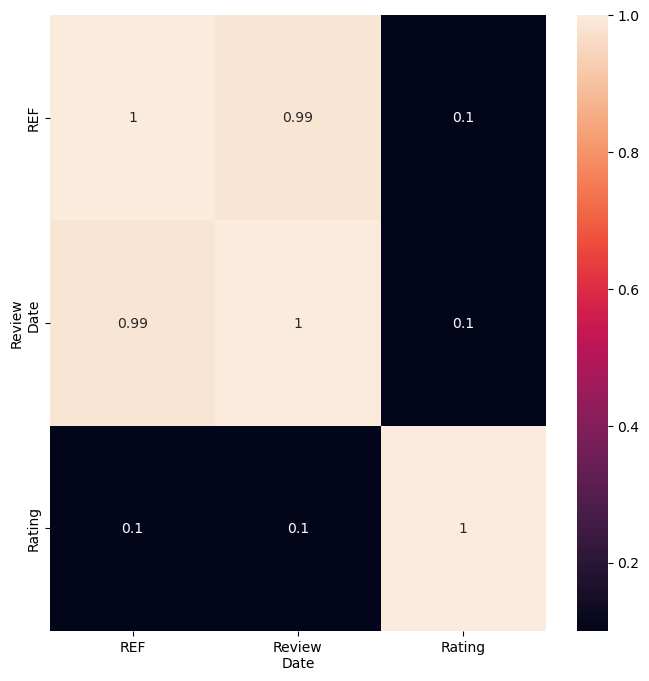

In [3]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

In [4]:
data.drop(['REF', 'Review\nDate'], axis=1, inplace=True)

In [5]:
data

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,70%,France,2.75,,Togo
2,A. Morin,Atsane,70%,France,3.00,,Togo
3,A. Morin,Akata,70%,France,3.50,,Togo
4,A. Morin,Quilla,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...
1790,Zotter,Peru,70%,Austria,3.75,,Peru
1791,Zotter,Congo,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,62%,Austria,3.25,,India


### Preprocessing

In [6]:
data.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [7]:
data = data.dropna(axis=0)

In [8]:
data.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [9]:
def removePercents(data):
    return data.apply(lambda x: float(x.strip('%')) / 100)

In [10]:
data.columns = ['Company', 'SpecificOrigin', 'CocoaPercent', 'Location', 'Rating', 'BeanType', 'BroadOrigin']

In [11]:
data

,Company,SpecificOrigin,CocoaPercent,Location,Rating,BeanType,BroadOrigin
0,A. Morin,Agua Grande,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,70%,France,2.75,,Togo
2,A. Morin,Atsane,70%,France,3.00,,Togo
3,A. Morin,Akata,70%,France,3.50,,Togo
4,A. Morin,Quilla,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...
1790,Zotter,Peru,70%,Austria,3.75,,Peru
1791,Zotter,Congo,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,62%,Austria,3.25,,India


In [12]:
data['CocoaPercent'] = removePercents(data['CocoaPercent'])
data['CocoaPercent']

/tmp/ipykernel_20405/1943461562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CocoaPercent'] = removePercents(data['CocoaPercent'])


0       0.63
1       0.70
2       0.70
3       0.70
4       0.70
        ... 
1790    0.70
1791    0.65
1792    0.65
1793    0.62
1794    0.65
Name: CocoaPercent, Length: 1793, dtype: float64

In [13]:
{column: len(data[column].unique()) for column in data.columns}

{'Company': 416,
 'SpecificOrigin': 1038,
 'CocoaPercent': 45,
 'Location': 60,
 'Rating': 13,
 'BeanType': 41,
 'BroadOrigin': 99}

In [14]:
categorical_features = ['Company', 'SpecificOrigin', 'Location', 'BeanType', 'BroadOrigin']

In [15]:
def onehot_encode(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column], prefix=column)
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data

In [19]:
data = onehot_encode(data, categorical_features)
data

,CocoaPercent,Rating,Company_A. Morin,Company_AMMA,Company_Acalli,Company_Adi,Company_Aequare (Gianduja),Company_Ah Cacao,Company_Akesson's (Pralus),Company_Alain Ducasse,...,BroadOrigin_Venezuela,"BroadOrigin_Venezuela, Carribean","BroadOrigin_Venezuela, Dom. Rep.","BroadOrigin_Venezuela, Ghana","BroadOrigin_Venezuela, Java","BroadOrigin_Venezuela, Trinidad",BroadOrigin_Venezuela/ Ghana,BroadOrigin_Vietnam,BroadOrigin_West Africa,BroadOrigin_
0,0.63,3.75,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.70,2.75,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.70,3.00,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.70,3.50,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.70,3.50,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,0.70,3.75,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1791,0.65,3.00,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1792,0.65,3.50,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1793,0.62,3.25,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
y = data['Rating']
X = data.drop('Rating', axis=1)

In [21]:
X

,CocoaPercent,Company_A. Morin,Company_AMMA,Company_Acalli,Company_Adi,Company_Aequare (Gianduja),Company_Ah Cacao,Company_Akesson's (Pralus),Company_Alain Ducasse,Company_Alexandre,...,BroadOrigin_Venezuela,"BroadOrigin_Venezuela, Carribean","BroadOrigin_Venezuela, Dom. Rep.","BroadOrigin_Venezuela, Ghana","BroadOrigin_Venezuela, Java","BroadOrigin_Venezuela, Trinidad",BroadOrigin_Venezuela/ Ghana,BroadOrigin_Vietnam,BroadOrigin_West Africa,BroadOrigin_
0,0.63,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.70,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.70,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.70,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.70,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,0.70,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1791,0.65,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1792,0.65,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1793,0.62,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
y

0       3.75
1       2.75
2       3.00
3       3.50
4       3.50
        ... 
1790    3.75
1791    3.00
1792    3.50
1793    3.25
1794    3.00
Name: Rating, Length: 1793, dtype: float64

In [24]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,CocoaPercent,Company_A. Morin,Company_AMMA,Company_Acalli,Company_Adi,Company_Aequare (Gianduja),Company_Ah Cacao,Company_Akesson's (Pralus),Company_Alain Ducasse,Company_Alexandre,...,BroadOrigin_Venezuela,"BroadOrigin_Venezuela, Carribean","BroadOrigin_Venezuela, Dom. Rep.","BroadOrigin_Venezuela, Ghana","BroadOrigin_Venezuela, Java","BroadOrigin_Venezuela, Trinidad",BroadOrigin_Venezuela/ Ghana,BroadOrigin_Vietnam,BroadOrigin_West Africa,BroadOrigin_
0,0.362069,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.482759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.482759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.482759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.482759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,0.482759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1789,0.396552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1790,0.396552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1791,0.344828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Training

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train.shape, X_test.shape

((1434, 1655), (359, 1655))

In [28]:
inputs = tf.keras.Input(shape=(1655, ))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

2025-04-13 16:22:11.191128: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [30]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer=optimizer,
    loss='mse'
)

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1655)]            0         
                                                                 
 dense (Dense)               (None, 16)                26496     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 26,785
Trainable params: 26,785
Non-trainable params: 0
_________________________________________________________________


In [32]:
epochs = 50
batch_size = 32

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/50
36/36 [==============================] - 1s 17ms/step - loss: 7.8745 - val_loss: 5.4258
Epoch 2/50
36/36 [==============================] - 0s 12ms/step - loss: 3.2968 - val_loss: 1.4209
Epoch 3/50
36/36 [==============================] - 0s 11ms/step - loss: 0.6632 - val_loss: 0.3400
Epoch 4/50
36/36 [==============================] - 0s 7ms/step - loss: 0.3014 - val_loss: 0.2913
Epoch 5/50
36/36 [==============================] - 0s 5ms/step - loss: 0.2396 - val_loss: 0.2749
Epoch 6/50
36/36 [==============================] - 0s 7ms/step - loss: 0.2003 - val_loss: 0.2688
Epoch 7/50
36/36 [==============================] - 0s 9ms/step - loss: 0.1727 - val_loss: 0.2677
Epoch 8/50
36/36 [==============================] - 0s 11ms/step - loss: 0.1520 - val_loss: 0.2610
Epoch 9/50
36/36 [==============================] - 0s 12ms/step - loss: 0.1364 - val_loss: 0.2597
Epoch 10/50
36/36 [==============================] - 0s 9ms/step - loss: 0.1218 - val_loss: 0.2587
Epoch 11/50
36

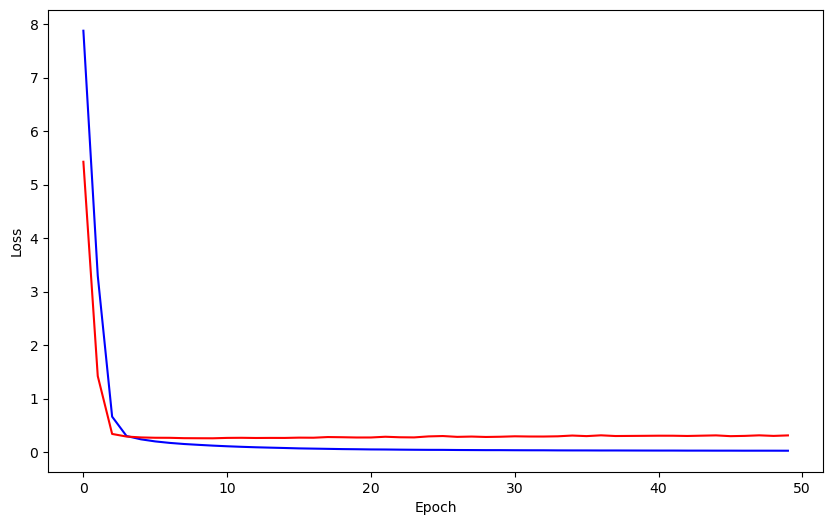

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(epochs), history.history['loss'], color='b')
plt.plot(range(epochs), history.history['val_loss'], color='r')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [37]:
np.argmin(history.history['val_loss'])

9

In [38]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.2699


0.26994821429252625